In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
import scipy.stats as stats
import statsmodels.api as sma
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
%matplotlib inline

In [5]:
pd.set_option('display.max_columns',1000)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth',1000)

In [6]:
df = pd.read_csv(r"D:\练习\数据集\beer-consumption-sao-paulo\Consumo_cerveja.csv")

In [7]:
df.shape

(365, 8)

In [8]:
df.describe().round(2)

,Temperatura_Mid,Temperatura_Min,Temperatura_Max,Precipitacao,weekend,Consumo,Temperatura_D
count,365.00,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25.40,5.39
std,3.18,2.83,4.32,12.42,0.45,4.40,1.85
min,12.90,10.60,14.50,0.00,0.00,14.34,0.88
25%,19.02,15.30,23.80,0.00,0.00,22.01,4.14
50%,21.38,17.90,26.90,0.00,0.00,24.87,5.54
75%,23.28,19.60,29.40,3.20,1.00,28.63,6.68
max,28.86,24.50,36.50,94.80,1.00,37.94,9.94


相关性

In [9]:
df.corr().round(4)

,Temperatura_Mid,Temperatura_Min,Temperatura_Max,Precipitacao,weekend,Consumo,Temperatura_D
Temperatura_Mid,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746,0.4340
Temperatura_Min,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925,0.0874
Temperatura_Max,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427,0.7481
Precipitacao,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938,-0.1571
weekend,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060,-0.0066
Consumo,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000,0.5122
Temperatura_D,0.4340,0.0874,0.7481,-0.1571,-0.0066,0.5122,1.0000


热图

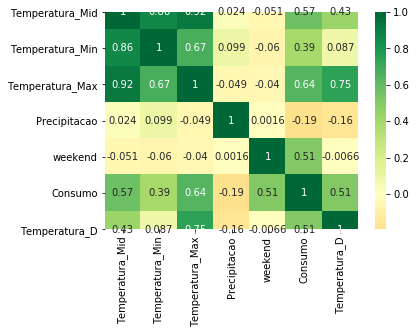

In [10]:
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns,cmap='RdYlGn', center=0, annot=True,square=True)

显著性分析

In [11]:
formula = 'Consumo~ Temperatura_Max + Precipitacao + weekend +Temperatura_Mid +Temperatura_Min+Temperatura_D'
anova_results = anova_lm(ols(formula,df).fit())
anova_results

,df,sum_sq,mean_sq,F,PR(>F)
Temperatura_Max,1.0,2909.490100,2909.490100,534.620127,4.388747e-73
Precipitacao,1.0,185.543450,185.543450,34.093693,1.176387e-08
weekend,1.0,1995.355611,1995.355611,366.647499,8.134832e-57
Temperatura_Mid,1.0,0.006436,0.006436,0.001183,9.725869e-01
Temperatura_Min,1.0,0.161908,0.161908,0.029751,8.631543e-01
Temperatura_D,1.0,4.375446,4.375446,0.803990,3.705039e-01
Residual,359.0,1953.736670,5.442163,NaN,NaN


天数与酒精消耗量

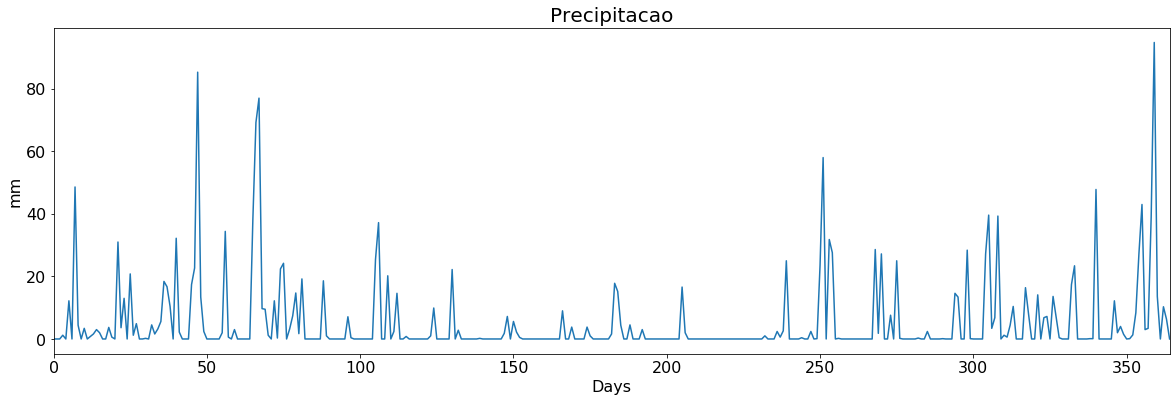

In [12]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.set_title('Precipitacao', fontsize=20)
ax.set_ylabel('mm', fontsize=16)
ax.set_xlabel('Days', fontsize=16)
ax = df['Precipitacao'].plot(fontsize=16)
plt.show()

天数与平均温度

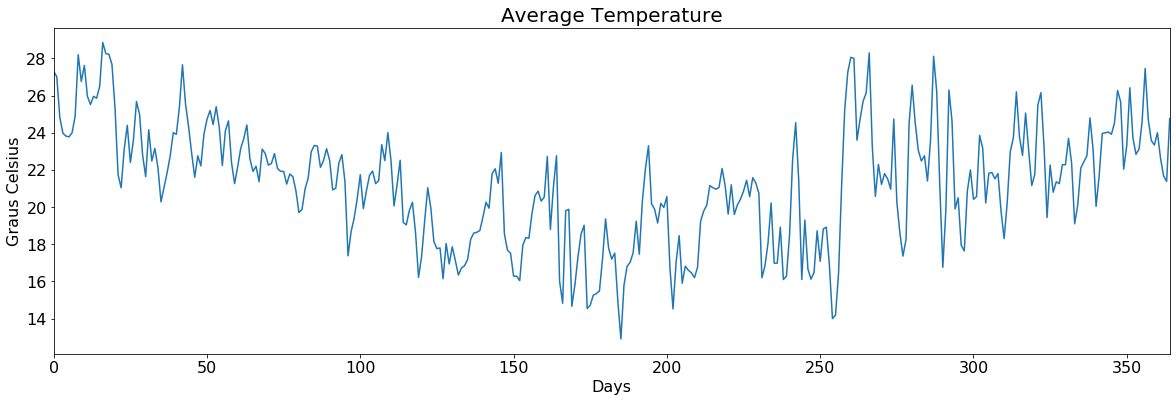

In [13]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.set_title('Average Temperature', fontsize=20)
ax.set_xlabel('Days', fontsize=16)
ax.set_ylabel('Graus Celsius', fontsize=16)
ax = df['Temperatura_Mid'].plot(fontsize=16)
plt.show()

非周末和周末的消耗量对比（箱线图）

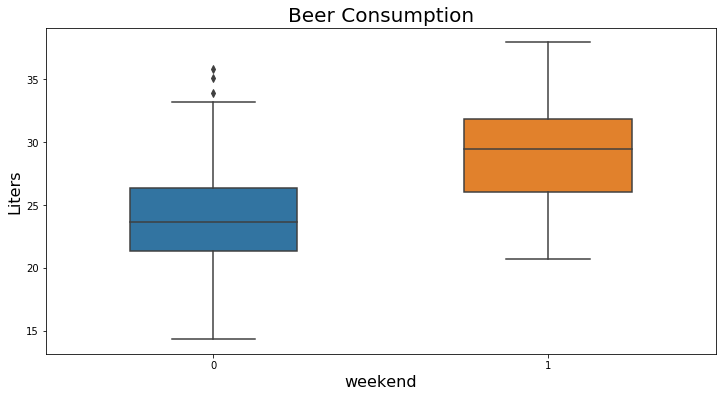

In [14]:
ax = sns.boxplot(x = 'weekend', y = 'Consumo', data = df, orient = 'v', width = 0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Beer Consumption', fontsize=20)
ax.set_ylabel('Liters', fontsize=16)
ax.set_xlabel('weekend', fontsize=16)
plt.show()

In [30]:
df1 = (df.Precipitacao) = 0
df2 = (df.Precipitacao) > 0 
stats.ttest_ind(df1,df2)

Ttest_indResult(statistic=nan, pvalue=nan)

各个变量与消耗量的散点图(带回归方程)

降雨量与啤酒消耗量散点图

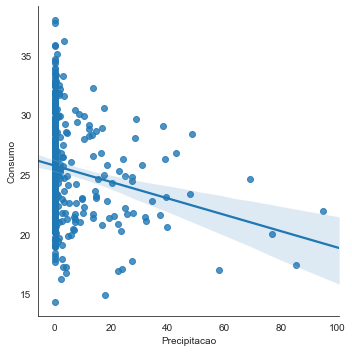

In [16]:
sns.set_style("white")
gridobj = sns.lmplot(x="Precipitacao", y="Consumo",data=df)
plt.show()

日平均温度与啤酒消耗量的散点图

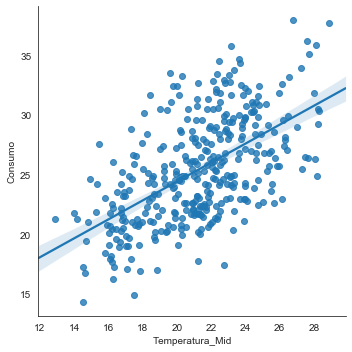

In [17]:
sns.set_style("white")
gridobj = sns.lmplot(x="Temperatura_Mid", y="Consumo",data=df)
plt.show()

日最高温度与啤酒消耗量的散点图

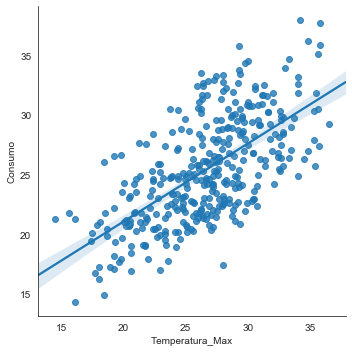

In [31]:
sns.set_style("white")
gridobj = sns.lmplot(x="Temperatura_Max", y="Consumo",data=df)
plt.show()

日最低温度与啤酒消耗量的散点图

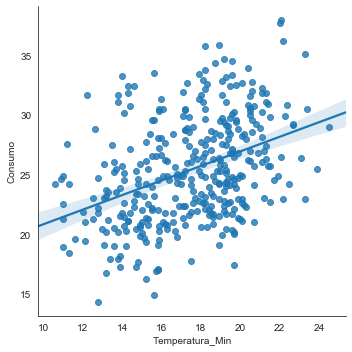

In [19]:
sns.set_style("white")
gridobj = sns.lmplot(x="Temperatura_Min", y="Consumo",data=df)
plt.show()

温差与啤酒消耗量的散点图

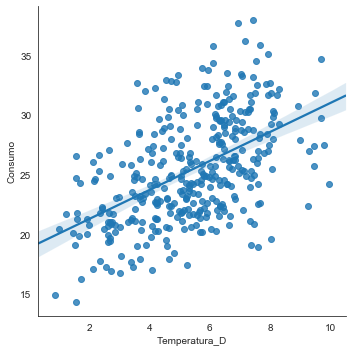

In [21]:
sns.set_style("white")
gridobj = sns.lmplot(x="Temperatura_D", y="Consumo",data=df)
plt.show()

最高温度周末和非周末与消耗量的散点图

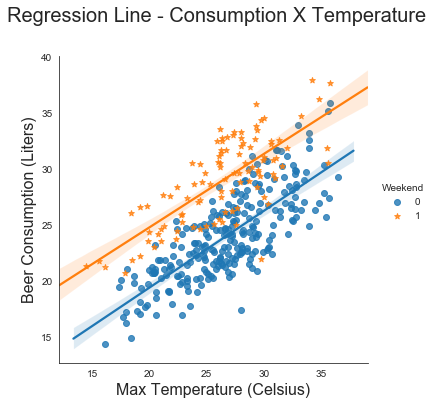

In [22]:
ax = sns.lmplot(x = 'Temperatura_Max',y = 'Consumo',data = df,hue = 'weekend',markers = ['o','*'],legend = False)
ax.fig.suptitle("Regression Line - Consumption X Temperature", fontsize=20, y=1.10)
ax.set_xlabels("Max Temperature (Celsius)", fontsize=16)
ax.set_ylabels("Beer Consumption (Liters)", fontsize=16)
ax.add_legend(title="Weekend")
plt.show()

建立多元线性回归模型(1)

In [38]:
y = df['Consumo']
X = df[['Temperatura_Max', 'Precipitacao', 'weekend']]
X = sma.add_constant(X.to_numpy())
results = sma.OLS(y,X).fit()
print(results.summary())
plt.show()


                            OLS Regression Results                            
Dep. Variable:                Consumo   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     313.5
Date:                Mon, 16 Dec 2019   Prob (F-statistic):          3.85e-100
Time:                        15:09:24   Log-Likelihood:                -824.09
No. Observations:                 365   AIC:                             1656.
Df Residuals:                     361   BIC:                             1672.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4321      0.774      8.310      0.0

y = df['Consumo']
X = df[['Temperatura_Max', 'Precipitacao', 'weekend','Temperatura_Mid']]
X = sma.add_constant(X.to_numpy())
results = sma.OLS(y,X).fit()
print(results.summary())
plt.show()


y = df['Consumo']
X = df[['Temperatura_Max', 'Precipitacao', 'weekend','Temperatura_Mid','Temperatura_Min','Temperatura_D']]
X = sma.add_constant(X.to_numpy())
results = sma.OLS(y,X).fit()
print(results.summary())
plt.show()

y = df['Consumo']
X = df[['Temperatura_Max', 'Precipitacao', 'weekend','Temperatura_D']]
X = sma.add_constant(X.to_numpy())
results = sma.OLS(y,X).fit()
print(results.summary())
plt.show()

#y = df['Consumo']
#X = df[['Temperatura_Max', 'Precipitacao', 'weekend','Temperatura_D','Temperatura_Mid']]
#X = sma.add_constant(X.to_numpy())
#results = sma.OLS(y,X).fit()
#print(results.summary())
#plt.show()

最终选取日最高温度，周末，降雨量作为最终自变量
残差：

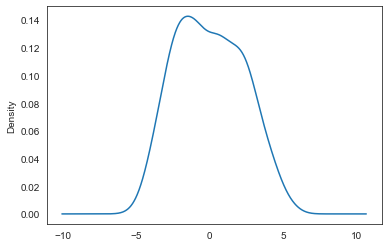

In [55]:
results.resid.plot.density()
plt.show()

划分训练集，验证集

In [70]:
y = df['Consumo']
X = df[['Temperatura_Max','Precipitacao','weekend']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=55550)

In [71]:
X_train.shape

(255, 3)

In [72]:
X_test.shape

(110, 3)

In [73]:
y_train.shape

(255,)

In [74]:
y_test.shape

(110,)

In [117]:
model = LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
result = {'label':y_test ,'pre':model.predict(X_test)}
result = pd.DataFrame(result)

In [118]:
result


,label,pre
293,31.139,27.660890
118,19.761,21.550665
185,21.294,21.076121
224,22.610,25.098537
34,24.738,21.994072
...,...,...
48,21.392,23.087139
261,31.836,35.167111
324,30.392,27.393649
2,30.814,31.487836


In [120]:
sore = result.label - result.pre
sore

293    3.478110
118   -1.789665
185    0.217879
224   -2.488537
34     2.743928
         ...   
48    -1.695139
261   -3.331111
324    2.998351
2     -0.673836
124    2.184504
Length: 110, dtype: float64

In [121]:
sum(sore)

52.60908404303197

简单的实验

In [77]:
Temperatura_Max =17.9
Precipitacao =16.6
weekend =1
entrance = [[Temperatura_Max, Precipitacao, weekend]]
print('Consumption: {0:.2f} liters'.format(model.predict(entrance)[0]))

Consumption: 22.50 liters


随机森林

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [82]:
param_grid={
    'n_estimators':[5,10,20,50,100,200],#决策树的个数
    'max_depth':[3,5,7],#最大树身
    'max_features':[0.6,0.7,0.8,1]  #决策划分时考虑的最大特证数
}

In [92]:
#实例化随机森林回归
rf=RandomForestRegressor()
#以随机森林回归器为基础构造网格搜索回归器
grid = GridSearchCV(rf,param_grid =param_grid ,cv =2)
grid.fit(X_train ,y_train)
rf_reg = grid.best_estimator_

c:\users\kong\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [116]:
rf_reg.feature_importances_
result = {'label':y_test ,'pre':rf_reg.predict(X_test)}
result = pd.DataFrame(result)
print(result)

      label        pre
293  31.139  27.194599
118  19.761  21.663660
185  21.294  23.487325
224  22.610  24.120259
34   24.738  21.690558
..      ...        ...
48   21.392  22.909234
261  31.836  35.917599
324  30.392  27.710172
2    30.814  30.862284
124  21.826  19.994777

[110 rows x 2 columns]


In [114]:
sore = result.label - result.pre

In [115]:
sore

293    3.944401
118   -1.902660
185   -2.193325
224   -1.510259
34     3.047442
         ...   
48    -1.517234
261   -4.081599
324    2.681828
2     -0.048284
124    1.831223
Length: 110, dtype: float64

In [109]:
sum(sore)

61.25743799370561

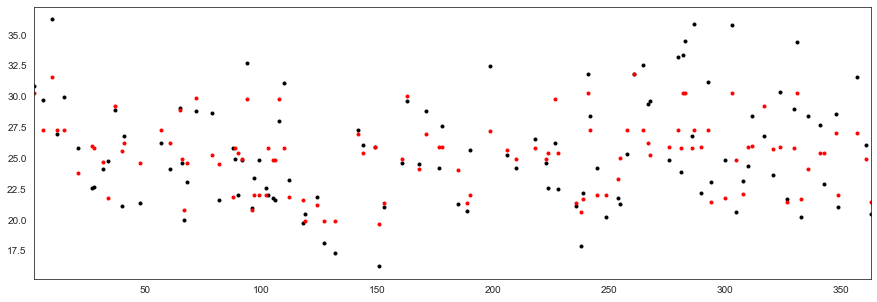

In [94]:
result['label'].plot(style='k.',figsize =(15,5))
result['pre'].plot(style='r.')

线性回归的效果比随机森林效果出色